## Reloading imports

In [2]:
from params import FuzzyInputVariable_List_Trapezoids
import numpy as np
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from optimizers.swarm import SwarmOptimizer, Phase
from optimizers.default import DefaultOptimizer
from optimizers.genetic import GeneticOptimizer, SmallestMaeErrorFitness, MultiPointCrossing, NRandomChangesMutation, RouletteWheelSelection, RankSelection

## Util functions

In [1]:
def generate_data(size, plot=False):
    x = np.arange(1, size, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))
    data_labels = np.round(dataX) * np.round(dataY)
    
    if plot:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
        ax.scatter(dataX, dataY, data_labels, c=rgb)
        plt.show()
    
    return dataXY, data_labels

In [5]:
d, _ = generate_data(2)
d

array([[1. , 1. ],
       [1.1, 1. ],
       [1.2, 1. ],
       [1.3, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.6, 1. ],
       [1.7, 1. ],
       [1.8, 1. ],
       [1.9, 1. ],
       [1. , 1.1],
       [1.1, 1.1],
       [1.2, 1.1],
       [1.3, 1.1],
       [1.4, 1.1],
       [1.5, 1.1],
       [1.6, 1.1],
       [1.7, 1.1],
       [1.8, 1.1],
       [1.9, 1.1],
       [1. , 1.2],
       [1.1, 1.2],
       [1.2, 1.2],
       [1.3, 1.2],
       [1.4, 1.2],
       [1.5, 1.2],
       [1.6, 1.2],
       [1.7, 1.2],
       [1.8, 1.2],
       [1.9, 1.2],
       [1. , 1.3],
       [1.1, 1.3],
       [1.2, 1.3],
       [1.3, 1.3],
       [1.4, 1.3],
       [1.5, 1.3],
       [1.6, 1.3],
       [1.7, 1.3],
       [1.8, 1.3],
       [1.9, 1.3],
       [1. , 1.4],
       [1.1, 1.4],
       [1.2, 1.4],
       [1.3, 1.4],
       [1.4, 1.4],
       [1.5, 1.4],
       [1.6, 1.4],
       [1.7, 1.4],
       [1.8, 1.4],
       [1.9, 1.4],
       [1. , 1.5],
       [1.1, 1.5],
       [1.2,

In [5]:
def test_optimizer(optimizer, size=4):
    # prepare data
    dataXY, data_labels = generate_data(size)
    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

    # create anfis
    mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(size)]
    var_names = [str(i) for i in range(size)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", var_names)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", var_names)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    # train
    start = time.time()
    fis.train(optimizer)
    elapsed_time = time.time() - start

    # evaluate on train data
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    train_accuracy = accuracy_score(y_train, y_pred)
    fis.show_results()

    # evaluate on test data
    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    test_accuracy = accuracy_score(y_test, y_pred)

    # print result
    print(f'Train data accuracy: {train_accuracy:.2f}')
    print(f'Test data accuracy: {test_accuracy:.2f}')
    print(f'Training time: {elapsed_time:.2f}')

# Tests

## Default optimizer

Optimization finished after 351.79s


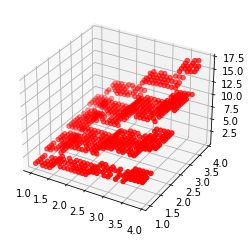

Train data accuracy: 0.96
Test data accuracy: 0.94
Training time: 351.79


In [7]:
optimizer = DefaultOptimizer(learn_operators=False)

test_optimizer(optimizer)

## Genetic optimizer

Evolution: 100%|██████████| 50000/50000 [43:25<00:00, 19.19it/s]

Optimization finished after 2605.64s


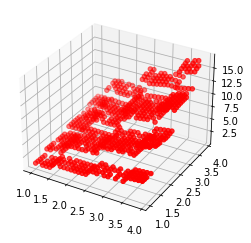

Train data accuracy: 0.97
Test data accuracy: 0.94
Training time: 2605.64


In [22]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=50_000,
    n_elite=2,
    patience=2000,
    learn_operators=False
)

test_optimizer(optimizer)

Evolution:  40%|███▉      | 15854/40000 [13:33<20:38, 19.50it/s]


Optimization finished after 813.14s


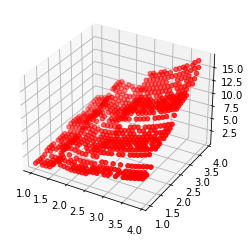

Train data accuracy: 0.64
Test data accuracy: 0.61
Training time: 813.14
Optimizing 80 parameters


In [21]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(4),
    NRandomChangesMutation(4),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=40_000,
    n_elite=2,
    patience=2000,
    learn_operators=False
)

test_optimizer(optimizer)

Optimizing 80 parameters


Evolution:  47%|████▋     | 18887/40000 [16:16<18:11, 19.34it/s]

Optimization finished after 976.44s


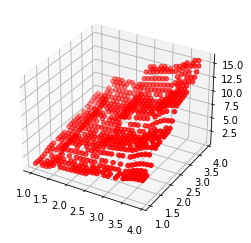

Train data accuracy: 0.64
Test data accuracy: 0.69
Training time: 976.44
Optimizing 80 parameters


In [20]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(4),
    NRandomChangesMutation(4),
    RankSelection(10),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=40_000,
    n_elite=4,
    patience=2000,
    learn_operators=False
)

test_optimizer(optimizer)

Optimizing 96 parameters


Evolution:  66%|██████▌   | 32857/50000 [28:13<14:43, 19.40it/s]


Optimization finished after 1693.48s


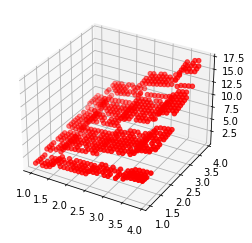

Train data accuracy: 0.79
Test data accuracy: 0.82
Training time: 1693.48


In [8]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=50_000,
    n_elite=2,
    patience=500,
    learn_operators=True
)

test_optimizer(optimizer)

## Particle Swarm optimizer

Evolving: 100%|██████████| 20000/20000 [03:53<00:00, 85.56it/s, v=0.35, value=789.7723] 


Optimization finished after 233.75s


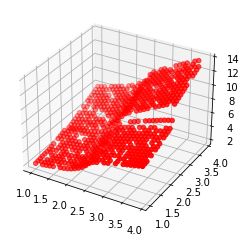

Train data accuracy: 0.27
Test data accuracy: 0.23
Training time: 233.75


In [89]:
phases = [
    Phase(w=1.0, c1=0, c2=0, phase_iters=5000),
    Phase(w=0.8, c1=0.2, c2=0, phase_iters=5000),
    Phase(w=0.7, c1=0.25, c2=0.25),
]

optimizer = SwarmOptimizer(
    phases,
    n_particles=1000,
    v=0.3,
    max_iters=20000,
    tol=1e-2,
    n_tol=900,
)

test_optimizer(optimizer, size=4)

Evolving: 100%|██████████| 100000/100000 [1:53:33<00:00, 14.68it/s, v=0.16, value=561.9028]

Optimization finished after 6813.08s


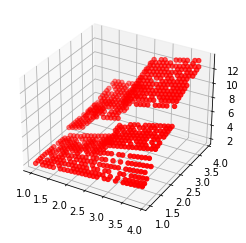

Train data accuracy: 0.38
Test data accuracy: 0.42
Training time: 6813.08


In [24]:
phases = [
    Phase(w=1.0, c1=0, c2=0, phase_iters=30000),
    Phase(w=0.8, c1=0.1, c2=0.1),
]

optimizer = SwarmOptimizer(
    phases,
    n_particles=1000,
    v=0.1,
    max_iters=100_000,
    tol=1e-4,
    n_tol=900,
)

test_optimizer(optimizer, size=4)

Evolving: 100%|██████████| 100000/100000 [1:36:14<00:00, 17.32it/s, v=0.17, value=719.2832]


Optimization finished after 5774.68s


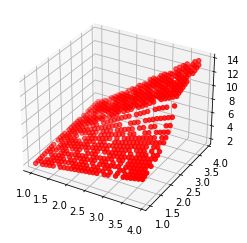

Train data accuracy: 0.29
Test data accuracy: 0.23
Training time: 5774.68


In [25]:
phases = [
    Phase(w=1.0, c1=0, c2=0, phase_iters=30000),
    Phase(w=0.9, c1=0.1, c2=0.1),
]

optimizer = SwarmOptimizer(
    phases,
    n_particles=1000,
    v=0.1,
    max_iters=100_000,
    tol=1e-4,
    n_tol=900,
)

test_optimizer(optimizer, si vze=4)